In [1]:
import keras
keras.__version__
from keras.datasets import imdb
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing. sequence import pad_sequences
import numpy as np
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import RNN, GRU, LSTM, SimpleRNN
import matplotlib.pyplot as plt
import os
from keras.layers import Dropout, Conv1D, MaxPooling1D
from keras.layers import Convolution1D, MaxPooling1D, ZeroPadding1D
import time


##code from chollet 6.1-using-word-embeddings

Using TensorFlow backend.


## Word embeddings with the `Embedding` layer


In [2]:
# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

In [3]:
# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

Dense model - Word embeddings with Embedding layer

In [4]:
model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 100, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

start_time = time.clock()
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
end_time = time.clock()
runtime = end_time - start_time  # seconds of wall-clock time

model.save_weights('dense_embeddings.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2001      
Total params: 1,002,001
Trainable params: 1,002,001
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 763us/step - loss: 0.5902 - acc: 0.6848 - val_loss: 0.5134 - val_acc: 0.7328
Epoch 2/10
20000/20000 [==============================] - 14s 708us/step - loss: 0.4272 - acc: 0.8034 - val_loss: 0.4949 - val_acc: 0.7510
Epoch 3/10
20000/20000 [==============================] - 12s 594us/s

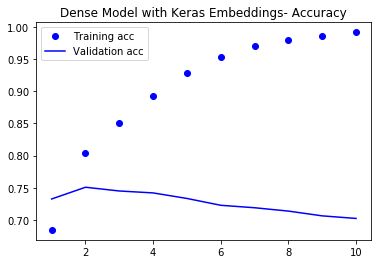

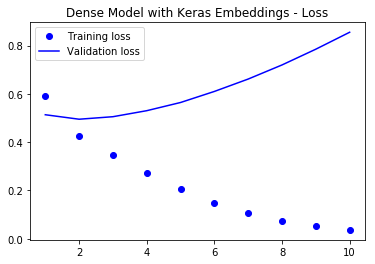

In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Dense Model with Keras Embeddings- Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Dense Model with Keras Embeddings - Loss')
plt.legend()

plt.show()

1D convolutional layer model - Word embeddings with Embedding layer

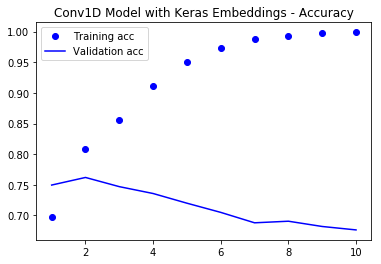

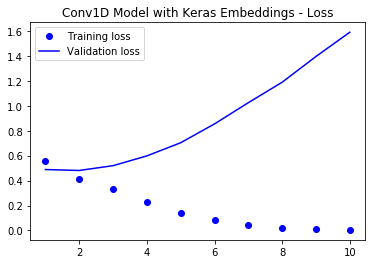

In [7]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Conv1D Model with Keras Embeddings - Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Conv1D Model with Keras Embeddings - Loss')
plt.legend()

plt.show()

GRU model - Word embeddings with Embedding layer

In [8]:
model3 = Sequential()
model3.add(Embedding(10000, 100, input_length=maxlen))
model3.add(GRU(32))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()

start_time = time.clock()
history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

end_time = time.clock()
runtime3 = end_time - start_time  # seconds of wall-clock time

model3.save_weights('GRU_embeddings.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,012,801
Trainable params: 1,012,801
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.5318 - acc: 0.7255 - val_loss: 0.4933 - val_acc: 0.7496
Epoch 2/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.4302 - acc: 0.8004 - val_loss: 0.4876 - val_acc: 0.7582
Epoch 3/10
20000/20000 [==============================] - 26s 1ms/step - 

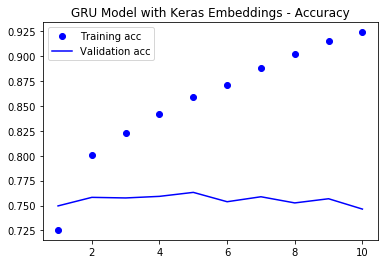

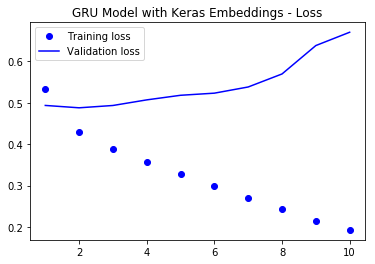

In [9]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('GRU Model with Keras Embeddings - Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('GRU Model with Keras Embeddings - Loss')
plt.legend()

plt.show()

LSTM model - Word embeddings with Embedding layer

In [10]:
model4 = Sequential()
model4.add(Embedding(10000, 100, input_length=maxlen))
model4.add(LSTM(32))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()

start_time = time.clock()
history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

end_time = time.clock()
runtime4 = end_time - start_time  # seconds of wall-clock time

model4.save_weights('LSTM_embeddings.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.5341 - acc: 0.7253 - val_loss: 0.4971 - val_acc: 0.7474
Epoch 2/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.4289 - acc: 0.8002 - val_loss: 0.4926 - val_acc: 0.7578
Epoch 3/10
20000/20000 [==============================] - 29s 1ms/step - 

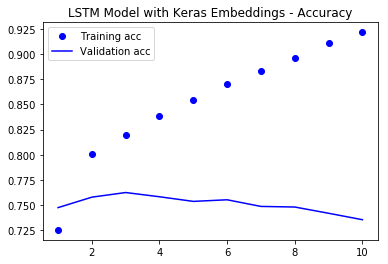

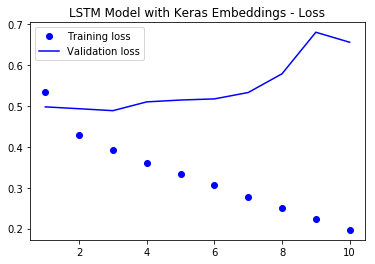

In [11]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('LSTM Model with Keras Embeddings - Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('LSTM Model with Keras Embeddings - Loss')
plt.legend()

plt.show()

simple rnn

In [12]:
model14 = Sequential()
model14.add(Embedding(10000, 100, input_length=maxlen))
model14.add(SimpleRNN(32))
model14.add(Dense(1, activation='sigmoid'))
model14.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model14.summary()

start_time = time.clock()
history14 = model14.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

end_time = time.clock()
runtime14 = end_time - start_time  # seconds of wall-clock time

model14.save_weights('RNN_embeddings.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                4256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,004,289
Trainable params: 1,004,289
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 938us/step - loss: 0.5513 - acc: 0.7111 - val_loss: 0.5407 - val_acc: 0.7374
Epoch 2/10
20000/20000 [==============================] - 17s 868us/step - loss: 0.3998 - acc: 0.8188 - val_loss: 0.5210 - val_acc: 0.7436
Epoch 3/10
20000/20000 [==============================] - 19s 964us/s

## Using pre-trained word embeddings - glove.6B.100d.txt


In [13]:
#download the IMDP data as raw text

imdb_dir = '/Users/MCJ/Documents/Northwestern/458 _AI_and_Deep Learning/week7/aclImdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [14]:
#Tokenize the data

maxlen = 20  # cut reviews after 20 words
training_samples = 25000  # training on 20000 samples
validation_samples = 5000  # validating on 5000 samples
max_words = 10000  #consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 20)
Shape of label tensor: (25000,)


In [15]:
#Pre-process the embeddings

glove_dir = '/Users/MCJ/Documents/Northwestern/458 _AI_and_Deep Learning/week7/Assignment 8/embeddings/gloVe.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [16]:
#build an embedding matrix to load into Embedding layer
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Dense Model - pre-trained word embeddings - glove.6B.100d.txt with 10000 training

In [17]:
model5 = Sequential()
model5.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model5.add(Flatten())
model5.add(Dense(32, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
model5.summary()

#load GloVe embeddings in the model
model5.layers[0].set_weights([embedding_matrix])
model5.layers[0].trainable = False #freeze layer so pre-trained parts are not updated

model5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

start_time = time.clock()
history5 = model5.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

end_time = time.clock()
runtime5 = end_time - start_time  # seconds of wall-clock time


model5.save_weights('dense_glove.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                64032     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,064,065
Trainable params: 1,064,065
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 183us/step - loss: 0.6461 - acc: 0.6234 - val_loss: 0.6101 - val_acc: 0.6632
Epoch 2/10
20000/20000 [==============================] - 3s 141us/step - los

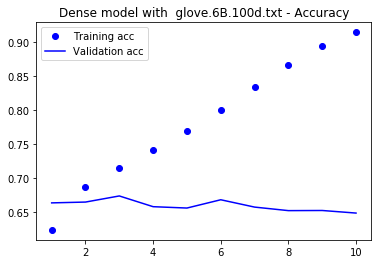

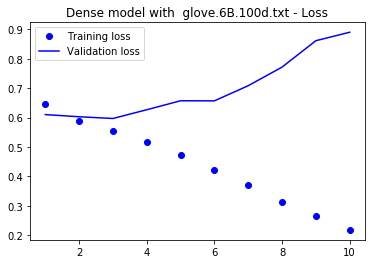

In [18]:

acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Dense model with  glove.6B.100d.txt - Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Dense model with  glove.6B.100d.txt - Loss')
plt.legend()

plt.show()

1D convolutional layer model - pre-trained word embeddings - glove.6B.100d.txt

In [19]:
model6 = Sequential()
model6.add(Embedding(10000, 100, input_length=maxlen))
model6.add(Conv1D(64, 4, activation='relu'))
model6.add(Flatten())
model6.add(Dense(1, activation='sigmoid'))
model6.summary()

#load GloVe embeddings in the model
model6.layers[0].set_weights([embedding_matrix])
model6.layers[0].trainable = False #freeze layer so pre-trained parts are not updated

model6.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

start_time = time.clock()
history6 = model6.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

end_time = time.clock()
runtime6 = end_time - start_time  # seconds of wall-clock time


model6.save_weights('Conv1D_glove.h5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 17, 64)            25664     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1088)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 1089      
Total params: 1,026,753
Trainable params: 1,026,753
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s 361us/step - loss: 0.6299 - acc: 0.6357 - val_loss: 0.5771 - val_acc: 0.6900
Epoch 2/10
20000/20000 [==============================] - 6s 313us/step - los

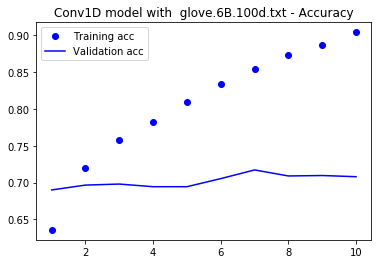

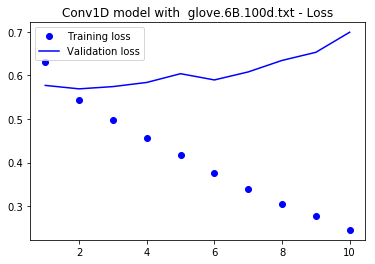

In [20]:

acc = history6.history['acc']
val_acc = history6.history['val_acc']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Conv1D model with  glove.6B.100d.txt - Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Conv1D model with  glove.6B.100d.txt - Loss')
plt.legend()

plt.show()

GRU model -  pre-trained word embeddings - glove.6B.100d.txt

In [21]:
model7 = Sequential()
model7.add(Embedding(10000, 100, input_length=maxlen))
model7.add(GRU(32))
model7.add(Dense(1, activation='sigmoid'))
model7.summary()

#load GloVe embeddings in the model
model7.layers[0].set_weights([embedding_matrix])
model7.layers[0].trainable = False #freeze layer so pre-trained parts are not updated

model7.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

start_time = time.clock()
history7 = model7.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

end_time = time.clock()
runtime7 = end_time - start_time  # seconds of wall-clock time


model7.save_weights('GRU_glove.h5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,012,801
Trainable params: 1,012,801
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 12s 613us/step - loss: 0.6115 - acc: 0.6583 - val_loss: 0.5575 - val_acc: 0.7064
Epoch 2/10
20000/20000 [==============================] - 11s 565us/step - loss: 0.5395 - acc: 0.7247 - val_loss: 0.5345 - val_acc: 0.7222
Epoch 3/10
20000/20000 [==============================] - 10s 514us/s

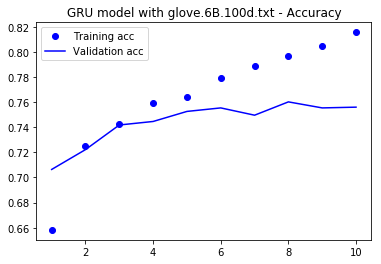

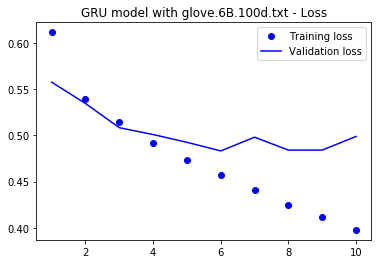

In [22]:

acc = history7.history['acc']
val_acc = history7.history['val_acc']
loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('GRU model with glove.6B.100d.txt - Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('GRU model with glove.6B.100d.txt - Loss')
plt.legend()

plt.show()

LSTM model -  pre-trained word embeddings - glove.6B.100d.txt

In [23]:
model8 = Sequential()
model8.add(Embedding(10000, 100, input_length=maxlen))
model8.add(LSTM(32))
model8.add(Dense(1, activation='sigmoid'))
model8.summary()

#load GloVe embeddings in the model
model8.layers[0].set_weights([embedding_matrix])
model8.layers[0].trainable = False #freeze layer so pre-trained parts are not updated

model8.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

start_time = time.clock()
history8 = model8.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

end_time = time.clock()
runtime8 = end_time - start_time  # seconds of wall-clock time


model8.save_weights('LSTM_glove.h5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 20, 100)           1000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 14s 709us/step - loss: 0.6095 - acc: 0.6596 - val_loss: 0.5581 - val_acc: 0.7016
Epoch 2/10
20000/20000 [==============================] - 13s 628us/step - loss: 0.5459 - acc: 0.7166 - val_loss: 0.5395 - val_acc: 0.7110
Epoch 3/10
20000/20000 [==============================] - 13s 650us/s

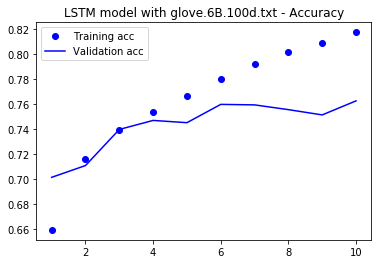

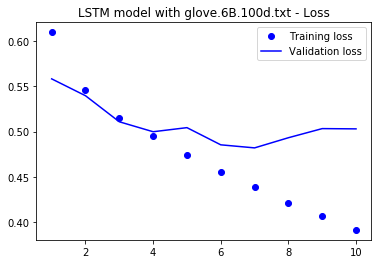

In [24]:

acc = history8.history['acc']
val_acc = history8.history['val_acc']
loss = history8.history['loss']
val_loss = history8.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('LSTM model with glove.6B.100d.txt - Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('LSTM model with glove.6B.100d.txt - Loss')
plt.legend()

plt.show()

CONV 1D and LSTM model -  pre-trained word embeddings - glove.6B.100d.txt

In [25]:
modelC_L = Sequential()
modelC_L.add(Embedding(10000, 100, input_length=maxlen))
modelC_L.add(Conv1D(64, 4, activation='relu'))
modelC_L.add(LSTM(32))
modelC_L.add(Dense(1, activation='sigmoid'))
modelC_L.summary()

#load GloVe embeddings in the model
modelC_L.layers[0].set_weights([embedding_matrix])
modelC_L.layers[0].trainable = False #freeze layer so pre-trained parts are not updated

modelC_L.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

start_time = time.clock()
historyC_L = modelC_L.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

end_time = time.clock()
runtimeC_L = end_time - start_time  # seconds of wall-clock time


modelC_L.save_weights('Conv_LSTM_glove.h5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 20, 100)           1000000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 17, 64)            25664     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,038,113
Trainable params: 1,038,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s 913us/step - loss: 0.6116 - acc: 0.6581 - val_loss: 0.5859 - val_acc: 0.6674
Epoch 2/10
20000/20000 [==============================] - 16s 793us/step - l

RNN model -  pre-trained word embeddings - glove.6B.100d.txt

In [26]:
from keras.layers import SimpleRNN 

model_RNN = Sequential()
model_RNN.add(Embedding(10000, 100, input_length=maxlen))
model_RNN.add(SimpleRNN(32))
model_RNN.add(Dense(1, activation='sigmoid'))
model_RNN.summary()

#load GloVe embeddings in the model
model_RNN.layers[0].set_weights([embedding_matrix])
model_RNN.layers[0].trainable = False #freeze layer so pre-trained parts are not updated

model_RNN.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

start_time = time.clock()
history_RNN = model_RNN.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

end_time = time.clock()
runtime_RNN = end_time - start_time  # seconds of wall-clock time


model_RNN.save_weights('RNN_glove.h5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 20, 100)           1000000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                4256      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 1,004,289
Trainable params: 1,004,289
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 6s 313us/step - loss: 0.6547 - acc: 0.6155 - val_loss: 0.6140 - val_acc: 0.6670
Epoch 2/10
20000/20000 [==============================] - 5s 254us/step - loss: 0.5986 - acc: 0.6834 - val_loss: 0.5966 - val_acc: 0.6818
Epoch 3/10
20000/20000 [==============================] - 5s 240us/step

Evaluate the models on the test data 

In [27]:
# tokenize the test data
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [28]:
model.load_weights('dense_embeddings.h5')
print("dense model Processing time (seconds): %f" % (runtime))
print (model.evaluate(x_test, y_test))

model5.load_weights('dense_glove.h5')
print("dense model with GLoVe Processing time (seconds): %f" % (runtime5))
print (model5.evaluate(x_test, y_test))

model2.load_weights('Conv1D_embeddings.h5')
print("Conv1D model Processing time (seconds): %f" % (runtime2))
print (model2.evaluate(x_test, y_test))

model6.load_weights('Conv1D_glove.h5')
print("Conv1D model with GLoVe Processing time (seconds): %f" % (runtime6))
print (model6.evaluate(x_test, y_test))

model14.load_weights('RNN_embeddings.h5')
print("RNN model Processing time (seconds): %f" % (runtime14))
print (model14.evaluate(x_test, y_test))

model_RNN.load_weights('RNN_glove.h5')
print("RNN model with GLoVe Processing time (seconds): %f" % (runtime_RNN))
print (model_RNN.evaluate(x_test, y_test))

model3.load_weights('GRU_embeddings.h5')
print("GRU model Processing time (seconds): %f" % (runtime3))
print (model3.evaluate(x_test, y_test))

model7.load_weights('GRU_glove.h5')
print("GRU model with GLoVe Processing time (seconds): %f" % (runtime7))
print (model7.evaluate(x_test, y_test))

model4.load_weights('LSTM_embeddings.h5')
print("LSTM model Processing time (seconds): %f" % (runtime4))
print (model4.evaluate(x_test, y_test))

model8.load_weights('LSTM_glove.h5')
print("LSTM model with GLoVe Processing time (seconds): %f" % (runtime8))
print (model8.evaluate(x_test, y_test))

modelC_L.load_weights('Conv_LSTM_glove.h5')
print("Conv1D and LSTM model with GLoVe Processing time (seconds): %f" % (runtimeC_L))
print (modelC_L.evaluate(x_test, y_test))



dense model Processing time (seconds): 135.121857
25000/25000 [==============================] - 1s 32us/step
[1.538089386138916, 0.51052]
dense model with GLoVe Processing time (seconds): 29.484145
25000/25000 [==============================] - 1s 58us/step
[0.8691720735740661, 0.6564]
Conv1D model Processing time (seconds): 192.777065
25000/25000 [==============================] - 3s 128us/step
[2.724991699676514, 0.51428]
Conv1D model with GLoVe Processing time (seconds): 63.961567
25000/25000 [==============================] - 3s 128us/step
[0.700617410697937, 0.70264]
RNN model Processing time (seconds): 182.355690
25000/25000 [==============================] - 3s 133us/step
[2.728748796005249, 0.51176]
RNN model with GLoVe Processing time (seconds): 52.425535
25000/25000 [==============================] - 3s 129us/step
[0.5727651812267304, 0.70064]
GRU model Processing time (seconds): 259.881813
25000/25000 [==============================] - 4s 173us/step
[1.2932699480819703, 0.5